In [2]:
!pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
  Using cached scipy-1.11.4-cp311-cp311-macosx_12_0_arm64.whl.metadata (165 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-macosx_12_0_arm64.whl (9.4 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.11.4-cp311-cp311-macosx_12_0_arm64.whl (29.7 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [7]:
#コサイン類似度

import sqlite3
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# データベースへの接続
conn = sqlite3.connect('tenki.sqlite')
cursor = conn.cursor()

# データベースからデータの取得
cursor.execute('SELECT date, pressure, temperature, humidity FROM weather_data')
data1 = cursor.fetchall()

cursor.execute('SELECT date, steps, stride_median, calories_burned, sedentary_calories_burned FROM local_tenki')
data2 = cursor.fetchall()

# データベース接続を閉じる
conn.close()

data1_array = data1_array[:, :4]
data2_array = data2_array[:, :4]

# コサイン類似度の計算
cosine_similarity_matrix = cosine_similarity(data1_array, data2_array)
cosine_similarity_value = cosine_similarity_matrix[0, 0]  # 例として1つの類似度を取得

print("コサイン類似度:", cosine_similarity_value)

コサイン類似度: 0.9978039591785808


In [3]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 11.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 19.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 9.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


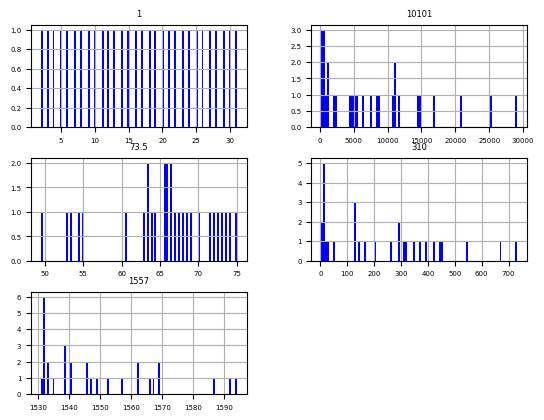

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ローカルデータ
df=pd.read_csv('/Users/takuto/dspro_last/ds_tenki/dspro_ローカルデータ.csv')
plt.rcParams["font.size"] = 5
df.hist(bins=100, color = "blue", grid =True, label = 'pandas')
plt.ylim(0,50)
plt.ylabel('frequency')
plt.xlabel('index')
plt.show()
plt.close()